In [1]:
#Importing Dependancies
import pandas as pd
import altair as alt
%matplotlib inline
import random
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#### Algorithmic Solution, very slow, uses ~200GB RAM at day 255

In [2]:
#Algorithmic Solution
#THIS IS THE GIVEN DATA FROM THE PROBLEM
#used to check 
lanterns= [1,3,3,4,5,1,1,1,1,1,1,2,1,4,1,1,1,5,2,2,4,3,1,1,2,5,4,2,2,3,1,2,3,2,1,1,4,4,2,4,4,1,2,4,3,3,3,1,1,3,4,5,2,5,1,2,5,1,1,1,3,2,3,3,1,4,1,1,4,1,4,1,1,1,1,5,4,2,1,2,2,5,5,1,1,1,1,2,1,1,1,1,3,2,3,1,4,3,1,1,3,1,1,1,1,3,3,4,5,1,1,5,4,4,4,4,2,5,1,1,2,5,1,3,4,4,1,4,1,5,5,2,4,5,1,1,3,1,3,1,4,1,3,1,2,2,1,5,1,5,1,3,1,3,1,4,1,4,5,1,4,5,1,1,5,2,2,4,5,1,3,2,4,2,1,1,1,2,1,2,1,3,4,4,2,2,4,2,1,4,1,3,1,3,5,3,1,1,2,2,1,5,2,1,1,1,1,1,5,4,3,5,3,3,1,5,5,4,4,2,1,1,1,2,5,3,3,2,1,1,1,5,5,3,1,4,4,2,4,2,1,1,1,5,1,2,4,1,3,4,4,2,1,4,2,1,3,4,3,3,2,3,1,5,3,1,1,5,1,2,2,4,4,1,2,3,1,2,1,1,2,1,1,1,2,3,5,5,1,2,3,1,3,5,4,2,1,3,3,4]
days = 0
list_days = []
for lantern in lanterns:
    while days < 10:
        #input days you want here max 150
        if 0 in lanterns:
            indices = []
            for i in range(len(lanterns)):
                if lanterns[i] == 0:
                    indices.append(i)
            lanterns = list(map(lambda lantern : lantern -1, lanterns))
            for index in indices:
                lanterns[index] = 6
                lanterns.append(8)
                    
        else:
            lanterns = list(map(lambda lantern : lantern -1, lanterns))
        list_days.append(len(lanterns))
        days +=1
        print (days)
    
print (len(lanterns))    

                
     

1
2
3
4
5
6
7
8
9
10
767


#### Loop Unravelled Value Tracking Method, tracks values rather than the whole list at a time

In [3]:
# Value Tracking Method
#SAME GIVEN DATA FROM PROBLEM
#faster method tracks values rather than the entire list starts at day 0 and not 1
lanterns = [1,3,3,4,5,1,1,1,1,1,1,2,1,4,1,1,1,5,2,2,4,3,1,1,2,5,4,2,2,3,1,2,3,2,1,1,4,4,2,4,4,1,2,4,3,3,3,1,1,3,4,5,2,5,1,2,5,1,1,1,3,2,3,3,1,4,1,1,4,1,4,1,1,1,1,5,4,2,1,2,2,5,5,1,1,1,1,2,1,1,1,1,3,2,3,1,4,3,1,1,3,1,1,1,1,3,3,4,5,1,1,5,4,4,4,4,2,5,1,1,2,5,1,3,4,4,1,4,1,5,5,2,4,5,1,1,3,1,3,1,4,1,3,1,2,2,1,5,1,5,1,3,1,3,1,4,1,4,5,1,4,5,1,1,5,2,2,4,5,1,3,2,4,2,1,1,1,2,1,2,1,3,4,4,2,2,4,2,1,4,1,3,1,3,5,3,1,1,2,2,1,5,2,1,1,1,1,1,5,4,3,5,3,3,1,5,5,4,4,2,1,1,1,2,5,3,3,2,1,1,1,5,5,3,1,4,4,2,4,2,1,1,1,5,1,2,4,1,3,4,4,2,1,4,2,1,3,4,3,3,2,3,1,5,3,1,1,5,1,2,2,4,4,1,2,3,1,2,1,1,2,1,1,1,2,3,5,5,1,2,3,1,3,5,4,2,1,3,3,4]
count_0 = lanterns.count(0)
count_1 = lanterns.count(1)
count_2 = lanterns.count(2)
count_3 = lanterns.count(3)
count_4 = lanterns.count(4)
count_5 = lanterns.count(5)
count_6 = lanterns.count(6)
count_7 = lanterns.count(7)
count_8 = lanterns.count(8)
for x in range (0,10):
    #subtract 1 from each 
    temp = count_0
    count_0 = count_1
    count_1 = count_2
    count_2 = count_3
    count_3 = count_4
    count_4 = count_5
    count_5 = count_6
    count_6 = count_7
    count_7 = count_8
    count_8 = temp
    count_6 += temp
    print (x)
print (count_0 + count_1 + count_2 + count_3 + count_4 + count_5 + count_6 + count_7 + count_8)        
    

        

0
1
2
3
4
5
6
7
8
9
767


#### Project Generation


In [4]:
input_elements = input ("Please enter the number of elements you would like to simulate")
random_list = []
x = int(input_elements)
for i in range (0,x):
    num = random.randint(0,6)
    random_list.append(num)
lanterns = random_list
print (f"your values are {random_list} with {len(lanterns)} elements")
input_days = input ("Please enter the number of days you would like to simulate")
day_input = int(input_days)
print (f"generating solution for {len(lanterns)} fish in {day_input} days")
        


Please enter the number of elements you would like to simulate 400


your values are [4, 5, 4, 6, 4, 2, 6, 1, 6, 5, 3, 3, 0, 3, 3, 1, 3, 2, 5, 5, 5, 4, 5, 5, 5, 2, 0, 2, 3, 0, 5, 5, 1, 2, 2, 1, 0, 1, 0, 3, 4, 6, 5, 0, 6, 0, 0, 3, 2, 4, 3, 2, 1, 2, 6, 6, 6, 5, 0, 5, 1, 3, 0, 2, 0, 2, 1, 4, 0, 0, 2, 6, 3, 4, 1, 1, 2, 4, 4, 5, 1, 2, 2, 0, 2, 5, 5, 3, 6, 2, 3, 4, 6, 3, 3, 4, 0, 0, 3, 1, 6, 0, 0, 0, 5, 0, 0, 0, 6, 0, 4, 2, 6, 4, 1, 3, 5, 0, 5, 3, 1, 4, 4, 0, 1, 0, 5, 4, 3, 3, 1, 3, 1, 0, 2, 2, 0, 0, 0, 2, 6, 4, 2, 6, 3, 0, 0, 2, 6, 0, 6, 6, 4, 3, 5, 4, 2, 0, 2, 3, 1, 5, 0, 0, 6, 4, 4, 6, 1, 3, 1, 4, 6, 3, 4, 3, 0, 0, 4, 2, 4, 3, 2, 3, 1, 6, 2, 1, 1, 6, 3, 3, 2, 0, 1, 3, 0, 3, 6, 6, 0, 3, 3, 4, 3, 2, 6, 2, 4, 6, 5, 1, 2, 3, 2, 0, 4, 5, 6, 6, 0, 5, 1, 0, 4, 1, 4, 6, 4, 1, 5, 1, 5, 4, 0, 4, 6, 0, 0, 2, 1, 0, 3, 4, 5, 3, 2, 0, 4, 4, 0, 0, 3, 0, 2, 1, 0, 0, 4, 5, 5, 1, 4, 2, 5, 5, 0, 2, 0, 3, 6, 4, 4, 0, 1, 0, 0, 0, 0, 6, 4, 4, 4, 0, 2, 5, 1, 5, 3, 2, 0, 6, 6, 6, 1, 3, 0, 5, 4, 0, 1, 3, 5, 4, 6, 4, 0, 2, 2, 5, 3, 1, 4, 4, 0, 4, 4, 1, 2, 6, 3, 5, 2, 1, 2, 0, 2, 1,

Please enter the number of days you would like to simulate 280


generating solution for 400 fish in 280 days


In [5]:
#returns panda generated by algo, used for solutions with less than 100 days
"""
input_days = input ("Please enter the number of days you would like to simulate")
day_input = int(input_days)
print (f"generating solution for {len(lanterns)} fish in {day_input} days")
days = 0
list_days = []
for lantern in lanterns:
    while days < day_input:
        if 0 in lanterns:
            indices = []
            for i in range(len(lanterns)):
                if lanterns[i] == 0:
                    indices.append(i)
            lanterns = list(map(lambda lantern : lantern -1, lanterns))
            for index in indices:
                    lanterns[index] = 6
                    lanterns.append(8)
        else:
            lanterns = list(map(lambda lantern : lantern -1, lanterns))
        list_days.append(len(lanterns))
        days += 1
        print (f"calculating day {days}")
print (f"the total amount of fish on day {day_input} is {len(lanterns)}")
day_list = []
for x in range(1,day_input):
    day_list.append(x)
    df_algo = pd.DataFrame(list_days)
    df_algo["Values"] = list_days
    df_algo.reset_index(inplace = True)
    df_algo.drop(df_algo.columns[1], axis = 1, inplace = True)
    df_algo.set_index("index", inplace = True)
df_algo.head()
"""                 
            
                    
        

    
    

'\ninput_days = input ("Please enter the number of days you would like to simulate")\nday_input = int(input_days)\nprint (f"generating solution for {len(lanterns)} fish in {day_input} days")\ndays = 0\nlist_days = []\nfor lantern in lanterns:\n    while days < day_input:\n        if 0 in lanterns:\n            indices = []\n            for i in range(len(lanterns)):\n                if lanterns[i] == 0:\n                    indices.append(i)\n            lanterns = list(map(lambda lantern : lantern -1, lanterns))\n            for index in indices:\n                    lanterns[index] = 6\n                    lanterns.append(8)\n        else:\n            lanterns = list(map(lambda lantern : lantern -1, lanterns))\n        list_days.append(len(lanterns))\n        days += 1\n        print (f"calculating day {days}")\nprint (f"the total amount of fish on day {day_input} is {len(lanterns)}")\nday_list = []\nfor x in range(1,day_input):\n    day_list.append(x)\n    df_algo = pd.DataFrame(li

In [6]:
#use when day_input > 100

print (f"generating solution for {len(lanterns)} fish in {day_input} days")
value_days = []
count_0 = lanterns.count(0)
count_1 = lanterns.count(1)
count_2 = lanterns.count(2)
count_3 = lanterns.count(3)
count_4 = lanterns.count(4)
count_5 = lanterns.count(5)
count_6 = lanterns.count(6)
count_7 = lanterns.count(7)
count_8 = lanterns.count(8)
for x in range(0,day_input):
    temp = count_0
    count_0 = count_1
    count_1 = count_2
    count_2 = count_3
    count_3 = count_4
    count_4 = count_5
    count_5 = count_6
    count_6 = count_7
    count_7 = count_8
    count_8 = temp
    count_6 += temp
    sum_day = count_0 + count_1 + count_2 + count_3 + count_4 + count_5 + count_6 + count_7 + count_8
    value_days.append(sum_day)
print (f"the total amount of fish on day {day_input} is {sum_day}")
df_test = pd.DataFrame(value_days)
df_test["Generated_Values"] = value_days
df_test.reset_index(inplace = True)
df_test.drop(df_test.columns[1], axis = 1, inplace = True)
df_test.set_index("index", inplace = True)
df_test.head()
df_test["Generated_Increase"] = df_test.Generated_Values.pct_change() * 100
df_test["Lagged_Increase"] = df_test.Generated_Increase.shift()
df_test.fillna(0,inplace = True)
df_test.head()


generating solution for 400 fish in 280 days
the total amount of fish on day 280 is 17280300607864


,Generated_Values,Generated_Increase,Lagged_Increase
index,,,
0,477,0.000000,0.000000
1,522,9.433962,0.000000
2,574,9.961686,9.433962
3,635,10.627178,9.961686
4,705,11.023622,10.627178


#### Train Data Set

In [7]:
#### Generating train set data
value_days = []
lanterns = [1,3,3,4,5,1,1,1,1,1,1,2,1,4,1,1,1,5,2,2,4,3,1,1,2,5,4,2,2,3,1,2,3,2,1,1,4,4,2,4,4,1,2,4,3,3,3,1,1,3,4,5,2,5,1,2,5,1,1,1,3,2,3,3,1,4,1,1,4,1,4,1,1,1,1,5,4,2,1,2,2,5,5,1,1,1,1,2,1,1,1,1,3,2,3,1,4,3,1,1,3,1,1,1,1,3,3,4,5,1,1,5,4,4,4,4,2,5,1,1,2,5,1,3,4,4,1,4,1,5,5,2,4,5,1,1,3,1,3,1,4,1,3,1,2,2,1,5,1,5,1,3,1,3,1,4,1,4,5,1,4,5,1,1,5,2,2,4,5,1,3,2,4,2,1,1,1,2,1,2,1,3,4,4,2,2,4,2,1,4,1,3,1,3,5,3,1,1,2,2,1,5,2,1,1,1,1,1,5,4,3,5,3,3,1,5,5,4,4,2,1,1,1,2,5,3,3,2,1,1,1,5,5,3,1,4,4,2,4,2,1,1,1,5,1,2,4,1,3,4,4,2,1,4,2,1,3,4,3,3,2,3,1,5,3,1,1,5,1,2,2,4,4,1,2,3,1,2,1,1,2,1,1,1,2,3,5,5,1,2,3,1,3,5,4,2,1,3,3,4]
count_0 = lanterns.count(0)
count_1 = lanterns.count(1)
count_2 = lanterns.count(2)
count_3 = lanterns.count(3)
count_4 = lanterns.count(4)
count_5 = lanterns.count(5)
count_6 = lanterns.count(6)
count_7 = lanterns.count(7)
count_8 = lanterns.count(8)
#creating the test set of 2500 days
for x in range (0,2500):
    #subtract 1 from each 
    temp = count_0
    count_0 = count_1
    count_1 = count_2
    count_2 = count_3
    count_3 = count_4
    count_4 = count_5
    count_5 = count_6
    count_6 = count_7
    count_7 = count_8
    count_8 = temp
    count_6 += temp
    sum_day = count_0 + count_1 + count_2 + count_3 + count_4 + count_5 + count_6 + count_7 + count_8
    value_days.append(sum_day)
train_set = pd.DataFrame(value_days)
train_set["Values"] = value_days
train_set.reset_index(inplace = True)
train_set.drop(train_set.columns[1], axis = 1, inplace = True)
train_set.set_index("index", inplace = True)
train_set.head(25)


,Values
index,
0,300
1,415
2,467
3,514
4,563
5,600
6,600
7,600
8,715


In [8]:
train_set["Increase"] = train_set.Values.pct_change() *100
train_set["Lagged Increase"] = train_set.Increase.shift()
train_set.fillna(0, inplace = True)
train_set.head()

,Values,Increase,Lagged Increase
index,,,
0,300,0.000000,0.000000
1,415,38.333333,0.000000
2,467,12.530120,38.333333
3,514,10.064240,12.530120
4,563,9.533074,10.064240


In [9]:
train = train_set
test = df_test

In [10]:
X_train = train["Lagged Increase"].to_frame()
X_test = test["Lagged_Increase"].to_frame()
y_train = train["Increase"].to_frame()
y_test = test["Generated_Increase"].to_frame()


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = model.predict(X_test)
Results = y_test
Results["Predicted Increase"] = predictions

In [13]:
Results

,Generated_Increase,Predicted Increase
index,,
0,0.000000,11.400310
1,9.433962,11.400310
2,9.961686,9.029824
3,10.627178,8.897222
4,11.023622,8.730003
...,...,...
275,9.162368,9.112609
276,8.991051,9.098068
277,9.247276,9.141115


array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>],
      dtype=object)

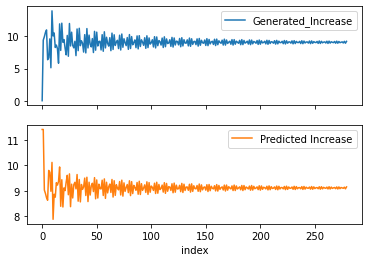

In [14]:
Results[:2000].plot(subplots=True)

<AxesSubplot:xlabel='index'>

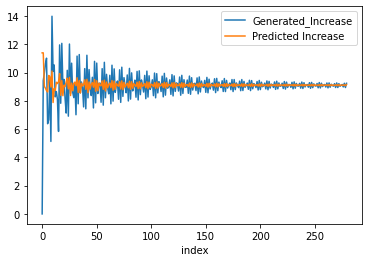

In [15]:
Results[:2000].plot()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Generated_Increase"],
    Results["Predicted Increase"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.0375792544274989


In [17]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Increase"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.9312530070060396


In [18]:
in_sample_results

,Increase,In-sample Predictions
index,,
0,0.000000,11.400310
1,38.333333,11.400310
2,12.530120,1.768233
3,10.064240,8.251847
4,9.533074,8.871453
...,...,...
2495,9.102447,9.113124
2496,9.102447,9.113124
2497,9.102447,9.113124


In [19]:
train["Value Difference"] = train["Values"].diff()
train.fillna(0,inplace = True)

In [20]:
train

,Values,Increase,Lagged Increase,Value Difference
index,,,,
0,300,0.000000,0.000000,0
1,415,38.333333,0.000000,115
2,467,12.530120,38.333333,52
3,514,10.064240,12.530120,47
4,563,9.533074,10.064240,49
...,...,...,...,...
2495,9213336276330578726237693854577772905604372255...,9.102447,9.102447,7686711697121311904038457600072227067708345037...
2496,1005197533225015986693612973858223664240149788...,9.102447,9.102447,8386390559195811406984358840044637367971256256...
2497,1096695106414900700475426731503727356269186696...,9.102447,9.102447,9149757318988471378181375764550369202903690867...


In [21]:
test["Generated Difference"] = test["Generated_Values"].diff()
test.fillna(0,inplace = True)

In [22]:
X_train = train["Value Difference"].iloc[0:50].to_frame()
X_test = test["Generated Difference"].iloc[0:50].to_frame()
y_train = train["Values"].iloc[0:50].to_frame()
y_test = test["Generated_Values"].iloc[0:50].to_frame()
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
Results = y_test
Results["Predicted Values"] = predictions
Results

,Generated_Values,Predicted Values
index,,
0,477,1141.338217
1,522,1574.464006
2,574,1641.839128
3,635,1728.464286
4,705,1815.089444
5,750,1574.464006
6,800,1622.589093
7,877,1882.464567
8,922,1574.464006


array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>],
      dtype=object)

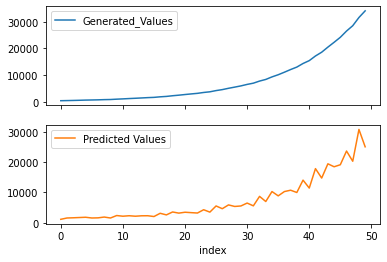

In [23]:
Results[:2000].plot(subplots=True)

number 125


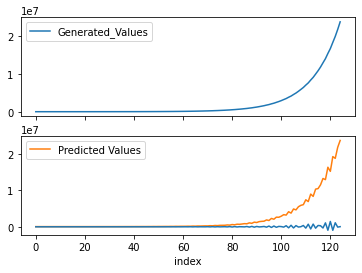

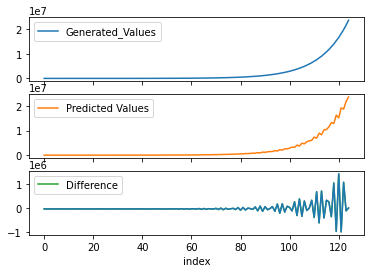

In [24]:
x = input("number")
x = int(x)
X_train = train["Value Difference"].iloc[0:x].to_frame()
X_test = test["Generated Difference"].iloc[0:x].to_frame()
y_train = train["Values"].iloc[0:x].to_frame()
y_test = test["Generated_Values"].iloc[0:x].to_frame()
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
Results = y_test
Results["Predicted Values"] = predictions
Results[:2000].plot(subplots=True)
Results["Difference"] = Results.apply(lambda x: x["Generated_Values"] - x["Predicted Values"], axis =1) 
Results["Difference"].plot()
Results[:2000].plot(subplots=True)
Results["Difference"] = Results.apply(lambda x: x["Generated_Values"] - x["Predicted Values"], axis =1) 
graph = Results["Difference"].plot()
#saving figures for powerpoint
#graph.figure.savefig('diff.png')

#### Naive Bayes Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [26]:
X_train = train["Value Difference"].iloc[0:100].values.reshape(-1,1)
X_test = test["Generated Difference"].iloc[0:100].values.reshape(-1,1)
y_train = train["Values"].iloc[0:100].values.reshape(-1,1)
y_test = test["Generated_Values"].iloc[0:100].values.reshape(-1,1)

In [27]:
#y_test = y_test.reshape(80)
#X_test = X_test.reshape(80)
#y_train = y_train.reshape(2500)
#y_test = y_test.reshape(80)
X_train=X_train.astype('int')
X_test = X_test.astype("int")
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [28]:
gnb = GaussianNB()

In [29]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\PC\anaconda3\envs\pyvizend\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
Results_NB = pd.DataFrame(y_pred)

<AxesSubplot:>

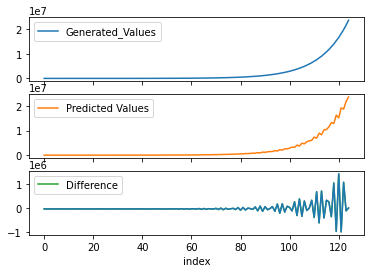

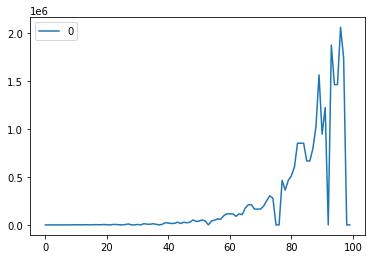

In [31]:
Results[:2000].plot(subplots=True)
Results["Difference"] = Results.apply(lambda x: x["Generated_Values"] - x["Predicted Values"], axis =1) 
Results["Difference"].plot()
Results_NB.plot()

#### Tensor Flow

In [32]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [33]:
#train = train.iloc[0:150] <- using this changes the final results from infinity to 0
train

,Values,Increase,Lagged Increase,Value Difference
index,,,,
0,300,0.000000,0.000000,0
1,415,38.333333,0.000000,115
2,467,12.530120,38.333333,52
3,514,10.064240,12.530120,47
4,563,9.533074,10.064240,49
...,...,...,...,...
2495,9213336276330578726237693854577772905604372255...,9.102447,9.102447,7686711697121311904038457600072227067708345037...
2496,1005197533225015986693612973858223664240149788...,9.102447,9.102447,8386390559195811406984358840044637367971256256...
2497,1096695106414900700475426731503727356269186696...,9.102447,9.102447,9149757318988471378181375764550369202903690867...


In [34]:
window_size = 1

feature_column = 0
target_column = 0
X, y = window_data(train, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[300]
 [415]
 [467]
 [514]
 [563]] 

y sample values:
[[415]
 [467]
 [514]
 [563]
 [600]]


In [35]:
split = int(0.5 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [36]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


In [37]:
window_size = 1

feature_column = 0
target_column = 0
X, y = window_data(train, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[300]
 [415]
 [467]
 [514]
 [563]] 

y sample values:
[[415]
 [467]
 [514]
 [563]
 [600]]


In [38]:
X_train = X
X_test = test["Generated_Values"].values.reshape(-1,1)
y_train = y
y_test = test["Generated_Values"].values.reshape(-1,1)

In [39]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


In [40]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.00000000e+00]]

 [[9.61119621e-96]]

 [[1.39571284e-95]]

 [[1.78851825e-95]]

 [[2.19803879e-95]]] 

X_test sample values:
[[[1.47928846e-95]]

 [[1.85537875e-95]]

 [[2.28997197e-95]]

 [[2.79978324e-95]]

 [[3.38481258e-95]]]


In [41]:
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [42]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 5)              140       
                                                                 
 dropout (Dropout)           (None, 1, 5)              0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 5)              220       
                                                                 
 dropout_1 (Dropout)         (None, 1, 5)              0         
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [44]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
2499/2499 [==============================] - 6s 1ms/step - loss: 4.8630e-04
Epoch 2/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.0037
Epoch 3/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.0023
Epoch 4/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.0022A:
Epoch 5/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.0019
Epoch 6/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.0013
Epoch 7/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.0011
Epoch 8/10
2499/2499 [==============================] - 4s 1ms/step - loss: 6.2861e-04
Epoch 9/10
2499/2499 [==============================] - 4s 1ms/step - loss: 4.8839e-04
Epoch 10/10
2499/2499 [==============================] - 4s 1ms/step - loss: 6.0755e-04


In [45]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 1ms/step - loss: 0.0063


0.006342434324324131

In [46]:
predicted = model.predict(X_test)

In [47]:
predicted_values = scaler.inverse_transform(predicted)
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

C:\Users\PC\anaconda3\envs\pyvizend\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: overflow encountered in true_divide
  X /= self.scale_


In [48]:
values = pd.DataFrame({
    "Real": real_values.ravel(),
    "Predicted": predicted_values.ravel()
    })
values.head()

,Real,Predicted
0,477.0,inf
1,522.0,inf
2,574.0,inf
3,635.0,inf
4,705.0,inf


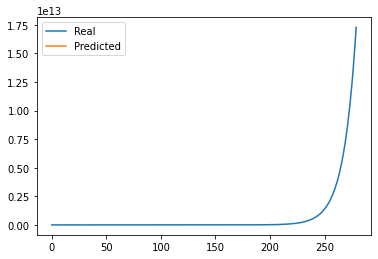

In [49]:
plot = values.plot()
#plot.figure.savefig("plot.png") this saved the figure